In [17]:
import os
import warnings
import matplotlib
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
drive.mount('/content/drive', force_remount=True)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV

Mounted at /content/drive


In [18]:
dataset_path = os.path.join(os.getcwd(),"drive/My Drive/BDS_hw5/Breast_Cancer_dataset.csv")

#1. Preprocessing

In [19]:
data =  pd.read_csv(dataset_path)

In [ ]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [20]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

There is no missing values to fill

Then we process all categorical values to numerical

In [21]:
X = data.drop(columns=["Status"])
y = data.Status.map({"Alive":1, "Dead": 0})

In [ ]:
X.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
dtype: object

In [22]:
X_int = pd.get_dummies(X, dtype=int)
X_int.dtypes

Age                                        int64
Tumor Size                                 int64
Regional Node Examined                     int64
Reginol Node Positive                      int64
Survival Months                            int64
Race_Black                                 int64
Race_Other                                 int64
Race_White                                 int64
Marital Status_Divorced                    int64
Marital Status_Married                     int64
Marital Status_Separated                   int64
Marital Status_Single                      int64
Marital Status_Widowed                     int64
T Stage _T1                                int64
T Stage _T2                                int64
T Stage _T3                                int64
T Stage _T4                                int64
N Stage_N1                                 int64
N Stage_N2                                 int64
N Stage_N3                                 int64
6th Stage_IIA       

Now we normalize all these data

In [23]:
x = X_int.values
min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(x), columns = X_int.columns)

X_scaled.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,...,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,0.974359,0.021583,0.383333,0.000000,0.556604,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.512821,0.244604,0.216667,0.088889,0.575472,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.717949,0.446043,0.216667,0.133333,0.698113,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.717949,0.122302,0.016667,0.000000,0.783019,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.435897,0.287770,0.033333,0.000000,0.462264,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


Use PCA and elbow plot to see how many dimension is appropriate

In [24]:
pca = PCA(n_components=20, svd_solver = 'auto')
Principal_components=pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data = Principal_components)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.412411,1.555988,-0.026465,-0.124269,-0.421341,-0.203184,-0.707112,-0.091140,-0.202379,0.010810,-0.131408,0.106392,0.051991,0.012349,-0.148515,-0.319101,-0.103308,0.001696,-0.035429,0.205977
1,-0.127479,-1.286921,0.752436,0.499171,-0.411766,-0.278027,-0.100083,0.200648,-0.502191,-0.050833,0.047179,0.003749,-0.039575,-0.094053,-0.284673,0.114264,0.093732,-0.011084,0.016132,-0.032219
2,-0.230733,-0.729243,0.753826,-0.372509,0.843624,1.314601,-0.281774,-0.715437,0.482803,0.684255,0.118803,-0.140102,-0.088053,-0.209582,0.145884,-0.073823,-0.136326,-0.226153,-0.312813,-0.136850
3,0.409809,1.559402,-0.038311,-0.112062,-0.430205,-0.235076,-0.714822,-0.098245,-0.159541,-0.012261,-0.084664,0.011035,0.012650,0.001164,-0.074618,-0.024419,-0.135367,-0.000547,-0.061515,-0.166636
4,1.217513,0.077251,-1.096744,0.051810,-0.498193,-0.228641,-0.604783,-0.155412,-0.067906,-0.044285,0.021029,-0.000216,-0.055032,0.011771,0.031681,-0.056223,0.256352,-0.011000,-0.044690,-0.168587


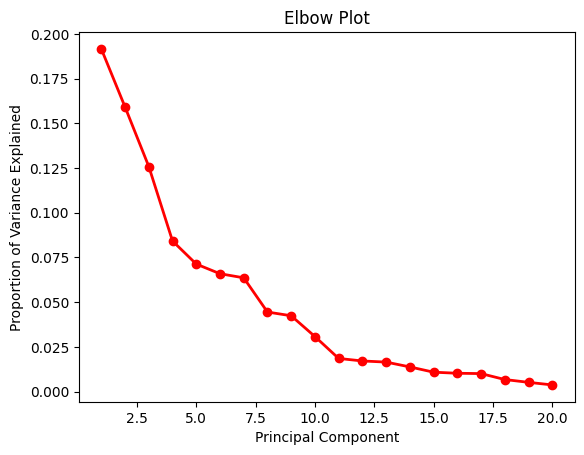

In [25]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The elbow turns mostly at 11, so we'll keep 11.

In [26]:
selector = SelectKBest(f_classif, k=11)
selector.fit(X_scaled, y)
cols_idxs = selector.get_support(indices=True)
X_new = X_scaled.iloc[:,cols_idxs]
X_new.dtypes

Reginol Node Positive           float64
Survival Months                 float64
N Stage_N1                      float64
N Stage_N3                      float64
6th Stage_IIA                   float64
6th Stage_IIIC                  float64
Grade_3                         float64
Estrogen Status_Negative        float64
Estrogen Status_Positive        float64
Progesterone Status_Negative    float64
Progesterone Status_Positive    float64
dtype: object

#2.Modeling

In [27]:
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X_new, y, test_size=0.2)

### 2.1 Feature Selection and Ranking

In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature ranking:")
print(feature_importances_sorted)


selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
selector.fit(X_train, y_train)

feature_mask = selector.get_support()

selected_features = X_train.columns[feature_mask]
print("Selected features:", selected_features)

X_train_selected = X_train.loc[:, feature_mask]
X_test_selected = X_test.loc[:, feature_mask]

X_train_selected.head()

Feature ranking:
                         Feature  Importance
1                Survival Months    0.717794
0          Reginol Node Positive    0.141961
6                        Grade_3    0.026318
3                     N Stage_N3    0.020658
2                     N Stage_N1    0.017556
4                  6th Stage_IIA    0.014579
7       Estrogen Status_Negative    0.013698
9   Progesterone Status_Negative    0.013573
10  Progesterone Status_Positive    0.012068
5                 6th Stage_IIIC    0.010987
8       Estrogen Status_Positive    0.010809
Selected features: Index(['Reginol Node Positive', 'Survival Months', 'N Stage_N1', 'N Stage_N3',
       '6th Stage_IIA', 'Grade_3'],
      dtype='object')


,Reginol Node Positive,Survival Months,N Stage_N1,N Stage_N3,6th Stage_IIA,Grade_3
2796,0.022222,0.830189,1.0,0.0,0.0,1.0
2475,0.000000,0.867925,1.0,0.0,0.0,0.0
3086,0.000000,0.377358,1.0,0.0,0.0,0.0
3704,0.177778,0.330189,0.0,0.0,0.0,1.0
472,0.000000,0.886792,1.0,0.0,1.0,0.0


### 2.2 KNN from scratch

In [28]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.to_numpy()
        self.y_train = y.to_numpy()

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute the distance from `x` to all points in `self.X_train`
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the indices of the points with the smallest distances (k nearest neighbors)
        k_indices = np.argsort(distances)[:self.k]

        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Determine the most common class label among the k nearest neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example usage:
# Assuming X_train, X_test, y_train, y_test are defined and are numpy arrays
# X_train and X_test should contain only numerical data

# Initialize and train the classifier
classifier = KNN(k=3)
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test.to_numpy())

# Calculate accuracy
fsc = f1_score(y_test, y_pred)
print(f"F1: {fsc:.2f}")

F1: 0.93


### 2.3 Model Performance

In [37]:
def compare_scores(scores_dict):
    df = pd.DataFrame(scores_dict).T.applymap(np.mean).style.background_gradient(cmap='RdYlGn')
    return df
classifiers = {'KNN': KNeighborsClassifier(),
               'Naive Bayes': GaussianNB(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'Gradient Boosting': GradientBoostingClassifier()}
scores_train = {}
for classifier in classifiers:
    scores_train[classifier] = cross_validate(classifiers[classifier],
            X_train_selected, y_train, cv=10, scoring=[
        'accuracy',
        'precision',
        'recall',
        'f1',
        'f1_macro',
        'f1_micro',
        ])
compare_scores(scores_train)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_f1_macro,test_f1_micro
KNN,0.007439,0.048148,0.887849,0.914267,0.956920,0.935057,0.761637,0.887849
Naive Bayes,0.004895,0.016801,0.835967,0.904153,0.901325,0.902637,0.690183,0.835967
Decision Tree,0.011921,0.020670,0.838458,0.906352,0.901686,0.903957,0.697376,0.838458
Random Forest,0.939595,0.066946,0.870765,0.910487,0.939246,0.924575,0.735891,0.870765
Gradient Boosting,0.453702,0.025898,0.898418,0.918473,0.965388,0.941330,0.781419,0.898418


#3.Tuning

In [ ]:
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [None, 5, 10, 15, 20]
param1['classifier'] = [clf1]
param2 = {}
param2['classifier__max_depth'] = [None, 5, 10, 15, 25]
param2['classifier__min_samples_split'] = [2, 5, 10]
param2['classifier'] = [clf2]
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2]
gs = GridSearchCV(pipeline, params, scoring='f1').fit(X_train,
        y_train)
print('Best parameter set: ' + str(gs.best_params_))
print('Best f1: %.3f' % gs.best_score_)



Best parameter set: {'classifier': RandomForestClassifier(max_depth=5, n_estimators=10), 'classifier__max_depth': 5, 'classifier__n_estimators': 10}
Best f1: 0.939


#4.Result

Most important features are the following

In [38]:
print(X_train_selected.columns.values)

['Reginol Node Positive' 'Survival Months' 'N Stage_N1' 'N Stage_N3'
 '6th Stage_IIA' 'Grade_3']
